In [2]:
import numpy as np
import matplotlib.pyplot as plt

def show_fft_alias(f_0, sample_frequency):
    raw_length = 100
    raw_frequency = 10000
    x_raw = np.linspace(0, raw_length, raw_length*raw_frequency)
    y_raw = np.cos(f_0*x_raw*2*np.pi)

    # run fft
    fft = np.fft.fft(y_raw)
    N = raw_length * raw_frequency 
    power = np.abs(fft)

    # Frequency bins
    frequencies = np.fft.fftfreq(N, 1/raw_frequency)

    # Only take the first half of the frequencies (up to the Nyquist frequency)
    half_N = N // 2
    frequencies = frequencies[:half_N]

    plt.figure(figsize=(12, 3))
    plt.subplot(141)
    plt.plot(frequencies, power[:half_N])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.yticks([])
    plt.title('Raw sample frequency = 10000 Hz')
    plt.subplot(142)
    plt.plot(frequencies, power[:half_N])
    plt.xlim(0, 20)
    plt.yticks([])
    plt.title('Raw sample frequency = 10000 Hz\nzoomed in')

    sample_length = 100    
    x_sample = np.linspace(0, sample_length, sample_length*sample_frequency)
    y_sample = np.cos(f_0*x_sample*2*np.pi)

    # run fft
    fft = np.fft.fft(y_sample)
    N = sample_length * sample_frequency 
    power = np.abs(fft)

    # Frequency bins
    frequencies = np.fft.fftfreq(N, 1/sample_frequency)

    # Only take the first half of the frequencies (up to the Nyquist frequency)
    half_N = N // 2
    frequencies = frequencies[:half_N]

    plt.subplot(143)
    plt.plot(frequencies, power[:half_N])
    plt.xlabel('Frequency (Hz)')
    plt.yticks([])
    plt.title(f'sample frequency = {sample_frequency} Hz')
    plt.suptitle(f'FFT of a cosine wave with frequency {f_0} Hz. When sampled with 10000 Hz vs {sample_frequency} Hz')


    plt.subplot(144)
    plt.plot(x_raw, y_raw)
    plt.plot(x_sample, y_sample)
    plt.xlim([0, 1])
    plt.xlabel('time (s)')
    plt.ylabel('Amplitude')
    plt.legend(['continuous (10000 Hz)', f'{sample_frequency} Hz'], bbox_to_anchor=(2, 1), loc='upper right')
    plt.title('sampled data')

    plt.tight_layout()

In [26]:
from pathlib import Path
fig_dir = Path('figs/2-lfp-spectral')
fig_dir.mkdir(parents=True, exist_ok=True)

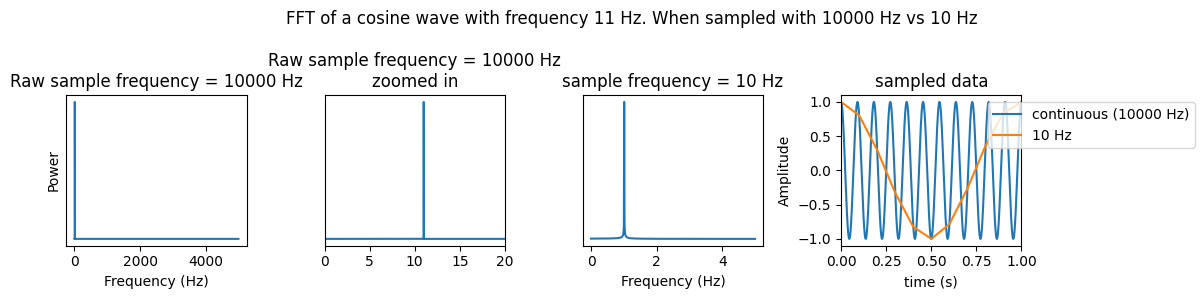

In [27]:
show_fft_alias(11, 10)
plt.savefig(fig_dir / 'fft-alias-10.png', dpi=300)

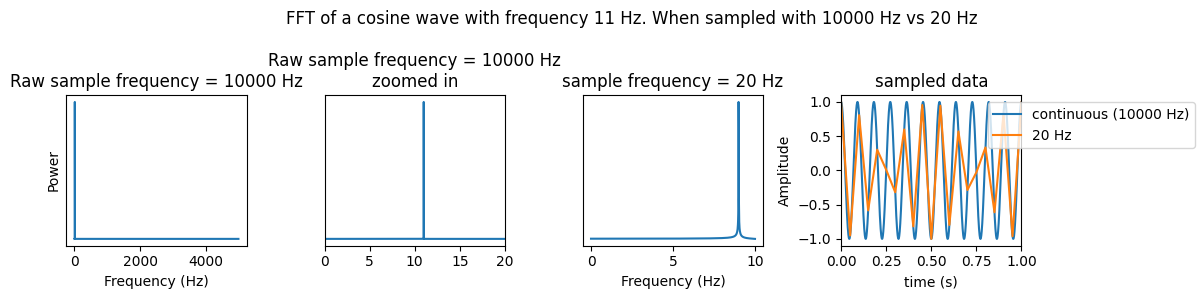

In [28]:
show_fft_alias(11, 20)
plt.savefig(fig_dir / 'fft-alias-20.png', dpi=300)

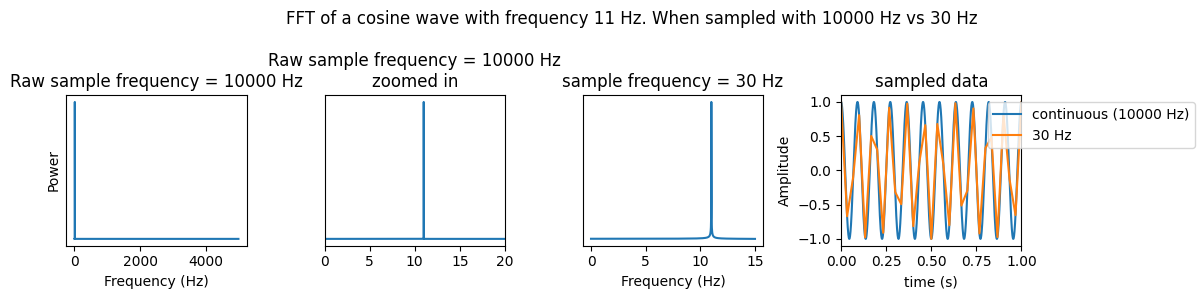

In [29]:
show_fft_alias(11, 30)
plt.savefig(fig_dir / 'fft-alias-30.png', dpi=300)

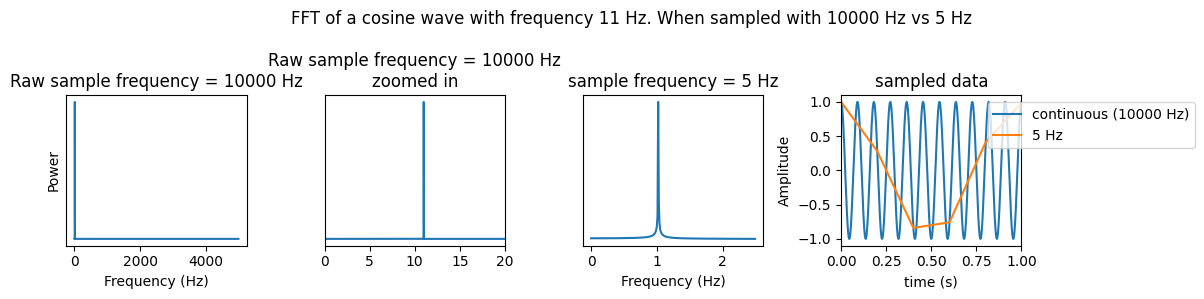

In [14]:
show_fft_alias(11, 5)


In [30]:
def fourier_transform(f_0, sample_frequency):
    sample_length = 100    
    x_sample = np.linspace(0, sample_length, sample_length*sample_frequency)
    y_sample = np.cos(f_0*x_sample*2*np.pi)

    # run fft
    fft = np.fft.fft(y_sample)
    N = sample_length * sample_frequency 
    

    # Frequency bins
    frequencies = np.fft.fftfreq(N, 1/sample_frequency)
    
    half_N = N // 2
    frequencies = frequencies[:half_N]
    power = np.abs(fft)
    
    return x_sample, y_sample, frequencies, power[:half_N] 
    

/tmp/ipykernel_4482/3101612206.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


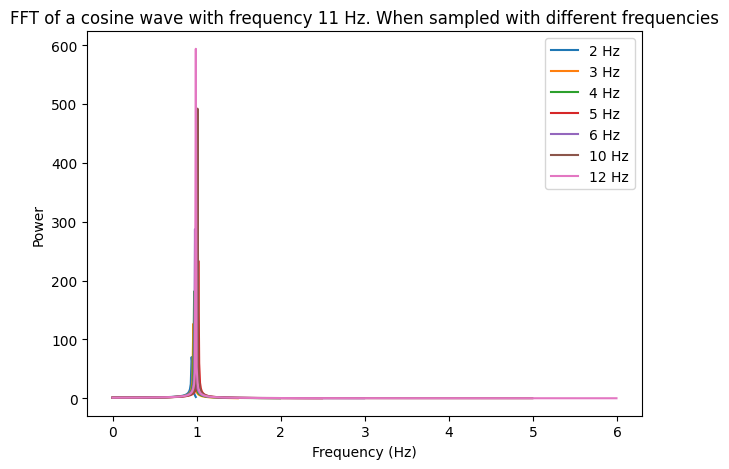

In [35]:
f_0 = 11

for i, sampling_frequency in enumerate([2,3,4,5,6,10,12]):
    
    x_sample, y_sample, frequencies, power = fourier_transform(f_0, sampling_frequency)
    plt.plot(frequencies, power, label=f'{sampling_frequency} Hz')
plt.legend()

plt.tight_layout()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('FFT of a cosine wave with frequency 11 Hz. When sampled with different frequencies')
plt.tight_layout()
plt.savefig(fig_dir / 'fft-alias-sampling.png', dpi=300)

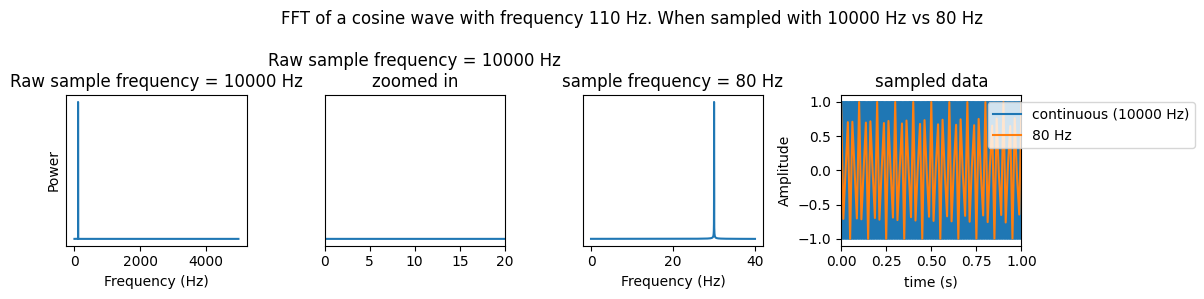

In [32]:
show_fft_alias(110, 80)
# plt.savefig(fig_dir / 'fft-alias-30.png', dpi=300)

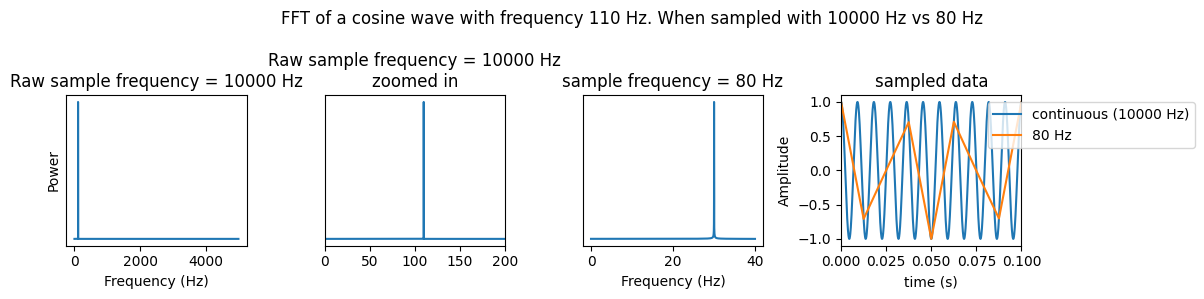

In [34]:
f_0 = 110
sample_frequency = 80
raw_length = 100
raw_frequency = 10000
x_raw = np.linspace(0, raw_length, raw_length*raw_frequency)
y_raw = np.cos(f_0*x_raw*2*np.pi)

# run fft
fft = np.fft.fft(y_raw)
N = raw_length * raw_frequency 
power = np.abs(fft)

# Frequency bins
frequencies = np.fft.fftfreq(N, 1/raw_frequency)

# Only take the first half of the frequencies (up to the Nyquist frequency)
half_N = N // 2
frequencies = frequencies[:half_N]

plt.figure(figsize=(12, 3))
plt.subplot(141)
plt.plot(frequencies, power[:half_N])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.yticks([])
plt.title('Raw sample frequency = 10000 Hz')
plt.subplot(142)
plt.plot(frequencies, power[:half_N])
plt.xlim(0, 200)
plt.yticks([])
plt.title('Raw sample frequency = 10000 Hz\nzoomed in')

sample_length = 100    
x_sample = np.linspace(0, sample_length, sample_length*sample_frequency)
y_sample = np.cos(f_0*x_sample*2*np.pi)

# run fft
fft = np.fft.fft(y_sample)
N = sample_length * sample_frequency 
power = np.abs(fft)

# Frequency bins
frequencies = np.fft.fftfreq(N, 1/sample_frequency)

# Only take the first half of the frequencies (up to the Nyquist frequency)
half_N = N // 2
frequencies = frequencies[:half_N]

plt.subplot(143)
plt.plot(frequencies, power[:half_N])
plt.xlabel('Frequency (Hz)')
plt.yticks([])
plt.title(f'sample frequency = {sample_frequency} Hz')
plt.suptitle(f'FFT of a cosine wave with frequency {f_0} Hz. When sampled with 10000 Hz vs {sample_frequency} Hz')


plt.subplot(144)
plt.plot(x_raw, y_raw)
plt.plot(x_sample, y_sample)
plt.xlim([0, 0.1])
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.legend(['continuous (10000 Hz)', f'{sample_frequency} Hz'], bbox_to_anchor=(2, 1), loc='upper right')
plt.title('sampled data')

plt.tight_layout()

plt.savefig(fig_dir / 'fft-110hz-alias-80.png', dpi=300)